# Importando dependencias

In [95]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plot

import pandas
import numpy

# Importando el conjunto de datos

In [96]:
baseball_hitting_dataset = pandas.read_csv('./data/baseball/baseball_hitting.csv')
baseball_pitcher_dataset = pandas.read_csv('./data/baseball/baseball_pitcher.csv')

In [97]:
baseball_pitcher_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player name         2575 non-null   object 
 1   Position            2575 non-null   object 
 2   Win                 2575 non-null   float64
 3   Loss                2575 non-null   float64
 4   Earned run Average  2575 non-null   float64
 5   Games played        2575 non-null   float64
 6   Games Started       2575 non-null   float64
 7   Complete Game       2575 non-null   float64
 8   Shutout             2575 non-null   float64
 9   Save                2575 non-null   float64
 10  Save Opportunity    2575 non-null   object 
 11  Innings pitched     2575 non-null   float64
 12  hit                 2575 non-null   float64
 13  run                 2575 non-null   float64
 14  earned run          2575 non-null   float64
 15  home run            2575 non-null   float64
 16   Hit B

In [98]:
baseball_pitcher_dataset.head()

,Player name,Position,Win,Loss,Earned run Average,Games played,Games Started,Complete Game,Shutout,Save,...,Innings pitched,hit,run,earned run,home run,Hit Batsmen,base on balls,Strikeouts,WHIP,AVG
0,N Ryan,P,324.0,292.0,3.19,807.0,773.0,222.0,61.0,3.0,...,5386.0,3923.0,2178.0,1911.0,321.0,158.0,2795.0,5714.0,1.25,0.204
1,R Johnson,P,303.0,166.0,3.29,618.0,603.0,100.0,37.0,2.0,...,4135.1,3346.0,1703.0,1513.0,411.0,190.0,1497.0,4875.0,1.17,0.221
2,R Clemens,P,354.0,184.0,3.12,709.0,707.0,118.0,46.0,0.0,...,4916.2,4185.0,1885.0,1707.0,363.0,159.0,1580.0,4672.0,1.17,0.229
3,S Carlton,P,329.0,244.0,3.22,741.0,709.0,254.0,55.0,2.0,...,5217.1,4672.0,2130.0,1864.0,414.0,53.0,1833.0,4136.0,1.25,0.24
4,B Blyleven,P,287.0,250.0,3.31,692.0,685.0,242.0,60.0,0.0,...,4970.0,4632.0,2029.0,1830.0,430.0,155.0,1322.0,3701.0,1.20,0.248


In [99]:
#Sumar las columnas Win y Loss para obtener el total de juegos jugados
baseball_pitcher_dataset['Total Games'] = baseball_pitcher_dataset['Win'] + baseball_pitcher_dataset['Loss']
baseball_pitcher_dataset.head()

,Player name,Position,Win,Loss,Earned run Average,Games played,Games Started,Complete Game,Shutout,Save,...,hit,run,earned run,home run,Hit Batsmen,base on balls,Strikeouts,WHIP,AVG,Total Games
0,N Ryan,P,324.0,292.0,3.19,807.0,773.0,222.0,61.0,3.0,...,3923.0,2178.0,1911.0,321.0,158.0,2795.0,5714.0,1.25,0.204,616.0
1,R Johnson,P,303.0,166.0,3.29,618.0,603.0,100.0,37.0,2.0,...,3346.0,1703.0,1513.0,411.0,190.0,1497.0,4875.0,1.17,0.221,469.0
2,R Clemens,P,354.0,184.0,3.12,709.0,707.0,118.0,46.0,0.0,...,4185.0,1885.0,1707.0,363.0,159.0,1580.0,4672.0,1.17,0.229,538.0
3,S Carlton,P,329.0,244.0,3.22,741.0,709.0,254.0,55.0,2.0,...,4672.0,2130.0,1864.0,414.0,53.0,1833.0,4136.0,1.25,0.24,573.0
4,B Blyleven,P,287.0,250.0,3.31,692.0,685.0,242.0,60.0,0.0,...,4632.0,2029.0,1830.0,430.0,155.0,1322.0,3701.0,1.20,0.248,537.0


In [100]:
#Obtener el porcentaje de juegos ganados
baseball_pitcher_dataset['Win Percentage'] = baseball_pitcher_dataset['Win'] / baseball_pitcher_dataset['Total Games']
baseball_pitcher_dataset.head()

,Player name,Position,Win,Loss,Earned run Average,Games played,Games Started,Complete Game,Shutout,Save,...,run,earned run,home run,Hit Batsmen,base on balls,Strikeouts,WHIP,AVG,Total Games,Win Percentage
0,N Ryan,P,324.0,292.0,3.19,807.0,773.0,222.0,61.0,3.0,...,2178.0,1911.0,321.0,158.0,2795.0,5714.0,1.25,0.204,616.0,0.525974
1,R Johnson,P,303.0,166.0,3.29,618.0,603.0,100.0,37.0,2.0,...,1703.0,1513.0,411.0,190.0,1497.0,4875.0,1.17,0.221,469.0,0.646055
2,R Clemens,P,354.0,184.0,3.12,709.0,707.0,118.0,46.0,0.0,...,1885.0,1707.0,363.0,159.0,1580.0,4672.0,1.17,0.229,538.0,0.657993
3,S Carlton,P,329.0,244.0,3.22,741.0,709.0,254.0,55.0,2.0,...,2130.0,1864.0,414.0,53.0,1833.0,4136.0,1.25,0.24,573.0,0.574171
4,B Blyleven,P,287.0,250.0,3.31,692.0,685.0,242.0,60.0,0.0,...,2029.0,1830.0,430.0,155.0,1322.0,3701.0,1.20,0.248,537.0,0.534451


In [101]:
baseball_pitcher_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player name         2575 non-null   object 
 1   Position            2575 non-null   object 
 2   Win                 2575 non-null   float64
 3   Loss                2575 non-null   float64
 4   Earned run Average  2575 non-null   float64
 5   Games played        2575 non-null   float64
 6   Games Started       2575 non-null   float64
 7   Complete Game       2575 non-null   float64
 8   Shutout             2575 non-null   float64
 9   Save                2575 non-null   float64
 10  Save Opportunity    2575 non-null   object 
 11  Innings pitched     2575 non-null   float64
 12  hit                 2575 non-null   float64
 13  run                 2575 non-null   float64
 14  earned run          2575 non-null   float64
 15  home run            2575 non-null   float64
 16   Hit B

# (Pendiente) Análisis Exploratorio de datos

##### La hipótesis actual que se tiene es la posibilidad de predecir el porcentaje de victorias de un jugador con base en sus strikeouts (o ponchados)

# División de datos de entrenamiento y de prueba

In [102]:
feature_data = baseball_pitcher_dataset[["Strikeouts"]]
objective_data = baseball_pitcher_dataset[["Win Percentage"]]

test_size = 0.2 # 20% de la información para pruebas (usando la regla recomendada del 80-20 o 70-30)

In [103]:
feature_data_train, feature_data_test, objective_data_train, objective_data_test = train_test_split(feature_data, objective_data, test_size=test_size, random_state=None)

# Modelo de Regresión Lineal con SciKitLearn

### Entrenamiento del modelo

In [104]:
model = linear_model.LinearRegression()
model.fit(feature_data_test, objective_data_test)

LinearRegression()

### Evaluación del Modelo

In [105]:
predicted_data = model.predict(feature_data_test)

#### Métodos valiosos para obtener información del modelo

**R².** mide qué tan bien el modelo explica la variación en los datos observados y varía entre 0 y 1. Un valor más alto de R² indica un mejor ajuste del modelo a los datos.

In [106]:
print(f"Valor de R²: {model.score(feature_data_test, objective_data_test)}")

Valor de R²: 0.07370589416544782


**Métricas de error.** Ambas métricas miden la diferencia entre los valores predichos y los valores reales de la variable objetivo.
- **Error Absoluto Medio (MAE)**:mide cuánto se desvían, en promedio, las predicciones del modelo de los valores reales. Es fácil de interpretar, ya que está en la misma unidad que los datos originales.
- **Error Cuadrático Medio (MSE)**: mide cuánto se desvían las predicciones del modelo de los valores reales. Sin embargo, en lugar de tomar el valor absoluto de las diferencias, las elevamos al cuadrado. Luego, calculamos el promedio de estas diferencias al cuadrado. El MSE penaliza más los errores grandes que el MAE, ya que al elevar al cuadrado las diferencias, los errores grandes tienen un impacto mayor en el resultado. Sin embargo, el MSE no está en la misma unidad que los datos originales, lo que puede dificultar su interpretación.
- **Error Cuadrático Medio de la Raíz (RMSE)**: es comúnmente utilizada para evaluar el rendimiento de modelos de regresión. El RMSE es simplemente la raíz cuadrada del Error Cuadrático Medio (MSE). Mide la magnitud promedio de los errores entre las predicciones del modelo y los valores reales. Al tomar la raíz cuadrada del MSE, el RMSE devuelve una métrica en la misma escala que los datos originales, lo que facilita su interpretación. Al igual que el MAE y el MSE, un valor más bajo de RMSE indica un mejor rendimiento del modelo.

In [107]:
mean_absolute_error = mean_absolute_error(objective_data_test, predicted_data)
mean_squared_error = mean_squared_error(objective_data_test, predicted_data)
root_mean_squared_error = numpy.sqrt(mean_squared_error)
print(f"Error absoluto medio: {mean_absolute_error} \nError cuadrático medio: {mean_squared_error} \nError cuadrático medio de la raíz: {root_mean_squared_error}")

Error absoluto medio: 0.06247708190018696 
Error cuadrático medio: 0.0071918608739379815 
Error cuadrático medio de la raíz: 0.08480483992047849


Cómo el rango de nuestro objetivo es de 0 a 1, el error absoluto puede considerarse un valor muy alto. Esto puede deberse a que el modelo no es capaz de predecir valores cercanos a 0 o 1 ya que la mayoría de los datos se encuentran en el rango de 0.4 a 0.6 tal que la mayoría de los lanzadores tienen un porcentaje de victorias entre 0.4 y 0.6

**Gráficos de residuos.** Los residuos son la diferencia entre los valores observados y los valores predichos. Un gráfico de residuos puede ayudarte a identificar patrones en los errores de predicción y a verificar si se cumplen los supuestos de la regresión lineal (por ejemplo, errores aleatorios, homocedasticidad, etc.).

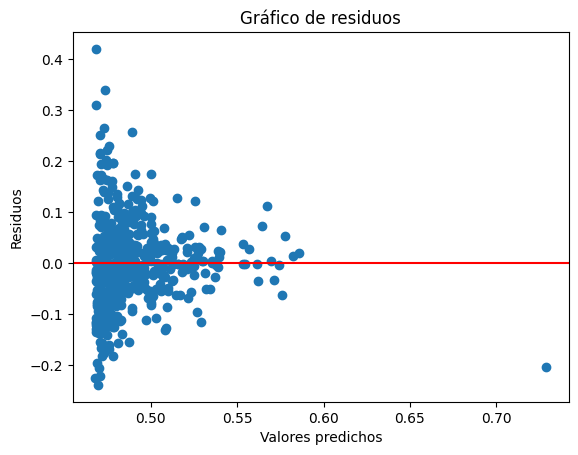

In [108]:
residuos = objective_data_test - predicted_data
plot.scatter(predicted_data, residuos)
plot.xlabel("Valores predichos")
plot.ylabel("Residuos")
plot.axhline(y=0, color='r', linestyle='-')
plot.title("Gráfico de residuos")
plot.show()

# Resultados del entrenamiento del modelo

In [109]:
resultados = pandas.Series(predicted_data.reshape(-1))
resultados

0      0.468078
1      0.472163
2      0.528126
3      0.491740
4      0.469580
         ...   
511    0.484604
512    0.475637
513    0.471834
514    0.469909
515    0.468923
Length: 516, dtype: float64